# TITLE: 

## TO DO LIST:
1. results and discussion
2. Layout: directory index??? if possible

**[Gitehub Repository:0006_Data_Science](https://github.com/qiyuechen1202/0006_Data_Science)**

## 1. INTRODUCTION
The research aims to explore the factors that affect the daily demand for bike-sharing ridership in New York (NYC) before and after the COVID-19 pandemic. It will adopt machine learning methods to predict the daily ridership demand, which can reflect the impact of these factors. The COVID-19 pandemic has significantly changed travel mode choices, and bike-sharing systems (BSS) as travel modes to replace public transport (PT) and maintain social distance have been promoted (Teixeira, Silva and Moura E Sá, 2021). During the pandemic, BSS in Seoul and London reported a growth trend for ridership (Li et al., 2021; Goh, Choi and Song, 2023). Furthermore, the studies revealed that the usage pattern of BSS has shifted from being a supplementary mode for PT before the pandemic to an alternative for short-term trips of PT (Kim and Cho, 2022; Ma et al., 2019; Ashraf et al., 2021). Thus, investigating the factors that affect the demand for BSS before and after the pandemic and exploring the changes between them will help contribute to further improving the supply of BSS. 

Citi Bike, the BSS in NYC, experienced a period during the pandemic when ridership declined and then gradually recovered (Wang and Noland, 2021). Subsequently, Citi Bike’s ridership continued to rise. In December 2021, it reported an average of 54,787 rides per day, showing a 74% increase compared to December 2019 (Lyft, 2020; Lyft, 2021). Since there are significant differences in ridership before and after the pandemic, the study will adopt Citi Bike data for 2019 and 2020 issued by Lyft to analyse the influence of weather, usage patterns and customer attributes on the Citi Bike ridership in the two periods.


In [387]:
import os
from urllib.request import urlopen
from requests import get
from urllib.parse import urlparse
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE

# import joblib
# random forest
from sklearn.ensemble import RandomForestRegressor

# feature importance
import rfpimp


# xgboost
import xgboost
from xgboost import XGBRegressor

In [388]:
# check the library version before we start
print("xgboost version:{}".format(xgboost.__version__))
print("sklearn version:{}".format(sklearn.__version__))

xgboost version:2.0.0
sklearn version:1.3.0


In [389]:
# calculate the total loss, bias, and variance
# IN THE FIRST TIME RUNNING 
# Note: need to install the mlxtend library 
!pip install mlxtend==0.21.0
from mlxtend.evaluate import bias_variance_decomp

## 2. LITERATURE REVIEW

**The Factors Influencing the BSS Trip before and during/after the Pandemic**

Before the pandemic, the motivating and inhibiting factors influencing BSS trip demand have been discussed in diverse aspects, mainly focusing on weather conditions, travel patterns, and customer attributes. Furthermore, previous studies have exposed the changes in BSS demand before and during/after the pandemic. 

**Weather Conditions**

Weather conditions display differential impacts on BSS demand in different cases. It is proved that temperature increases positively affect the BSS demand (El-Assi, Mahmoud and Habib, 2017). However, by modelling BSS demand in Daejeon, South Korea, in 2015, Kim (2018) stated that a daily temperature above 30°C would decrease BSS demand. Besides, some studies reported that precipitation and wind speed have a negative relationship with BSS demand (Kim, 2017; Chibwe et al., 2021). However, in their study of modelling BSS trip data collected from 2013 to 2015 in San Francisco Bay Area, Ashqar, Elhenawy, and Rakha (2019) found that precipitation was not a significant predictor, possibly due to the relatively small precipitation types in the area. Thus, it is essential to examine the influence of weather conditions on BSS demand in NYC since weather conditions have varying degrees of importance across different geographic areas. 

**Travel Patterns**

Trip duration and calendar attributes are employed to describe the impact of travel patterns on BSS demand. In the study of Toronto BSS in 2013, El-Assi, Mahmoud, and Habib (2017) reported that trip distance is negatively correlated to travel trips. Thus, shorter travel times are an important factor driving BSS demand in the Netherlands (Engbers and Hendriksen, 2010). However, in their study of three US cities during the pandemic, Padmanabhan et al.(2021) revealed that although BSS trips decreased, the average travel time increased. 

In addition, some studies have discussed the calendar impacts on BSS demand. Chibwe et al. (2021) revealed that weekends in London had lower BSS demand than weekdays, dropping by 17.4%. In contrast, Corcoran et al.(2014) indicated that weekends are positively associated with BSS usage in Brisbane, Australia. Moreover, the study by Kim (2018) did not find a difference in BSS demand between weekdays and weekends. Thus, calendar impacts on BSS demand still need to be further studied.


**User Attributes** 

Regarding customer attributes, gender and user type have been discussed as factors influencing BSS demand and have reflected significant changes before and after the pandemic. Females reported less demand for BSS than males in Texas in 2019(Blazanin et al., 2022). This gender difference in demand was demonstrated in pre-pandemic New York, where female members contributed less BSS demand (Reilly, Wang and Crossa, 2022). However, Uddin, Hwang and Hasine (2023) examined the BSS demand in NYC before and during the pandemic, revealing an opposite trend: female users demonstrated greater BSS demand than males during the pandemic. 

In addition, Marleau, Lee and Geneidy (2012) studied the impact of user types on BSS demand in Montreal, Canada, and stated that member users contributed more to increasing travel trips. On the contrary, Jia et al.(2023) revealed that, in Washington D.C., although BSS trips made by member users decreased during the pandemic, the trips made by casual users increased by 40% since the policy encouraged the shift of travel mode to BSS. Therefore, it is necessary to examine the impact of these variables on BSS demand after changes have occurred, providing insights into the management and supply of BSS. 

**The Machine Learning Techniques for Predicting BSS Demand** 

Previous research has explored applying various machine learning techniques to predict BSS demand. Studies by Feng and Wang (2017), and V. E. and Cho (2024) demonstrated the effectiveness of Random Forest (RF) in this topic, attributing its advantages to ensemble learning systems that combine different decision trees to enhance accuracy and mitigate overfitting (Li and Axhausen, 2019). Meanwhile, XGBoost (eXtreme Gradient Boosting), another ensemble learning for gradient boosting, has emerged as a promising approach for the prediction (Hu et al., 2022; Uddin, Hwang, & Hasnine, 2023). Notably, Lainjo (2020) reported higher accuracy of XGBoost compared to RF. Thus, this research aims to examine further and compare the performance of RF and XGBoost in predicting BSS demand.

## 3. RESEARCH QUESTION

Before COVID-19, BSS riderships were influenced by weather, travel patterns, and user attributes. However, the changes after COVID-19 still require analysis. Thus, the research questions are:

How can machine learning methods, particularly Random Forest and XGBoost, be effectively utilised to predict daily BSS demand?

Which variables reflect the relative importance of predicting BSS demand compared to before and after COVID-19?


## 4. PRESENTATION OF DATA



Table 1 The list of variables
|Aspects|Variable Name|Definition|Unit|Note|
|:---|:---|:---|:--|:--|
|**Target Variable**| Daily BSS Trip(Before)| Daily BSS trip from September 2019 to February 2020|Count||
||Daily Bike Trip(After)|Daily BSS trip from June 2020 to December 2020|Count||
|**Features**||||
|Weather Conditions|Average Temperature|Average temperature for the day|Fahrenheit(F)||
||Heating Degree Days (HDD) |The degrees of cold conditions (Lower than 65F) |Fahrenheit(F)||
||Cooling Degree Days (CDD)|The degrees of hot conditions (Higher than 65F) |Fahrenheit(F)||
||Total Liquid Content (TLC)|The water equivalent number of precipitation for the day|Inches(in)||
||Average Wind Speed|Daily average wind speed |Miles per hour||
|Travel Pattern| The Proportion of Trip Duration (within 15mins)|The Proportion of trip duration within 15mins for the day|%||
||The Proportion of Trip Duration (15-30mins)|The Proportion of trip duration between 15 to 30mins for the day|%||
||The Proportion of Trip Duration (above 30mins)|The Proportion of trip duration above 30 mins for the day|%||
||Day Type|The distinguish of weekday (1) and weekend (0) |/||
|User Attributes|Gender|The proportion of female and male users|%||
|| User Types|The proportion of customer(4-hour pass or 3-day pass user)|%||
|||The proportion of customer and subscriber(Annual Member)|%||


Table 2 The Extreme Weather Events (Source from [National Weather Service(2024)](https://www.weather.gov/okx/stormevents))
|Period|Date|Event|
|:---|:---|:---|
|Before COVID_19(Sep2019 to Feb 2020)| 2019-12-18| Snow Squall Event|
|After COVID_19(Jun 2020 to Dec 2020)|2020-06-06|Cold Front and Afternoon Thunderstorms|
||2020-07-10 |Tropical Storm Fay|
||2020-08-04|Tropical Storm Isaias|
||2020-08-27|EF-1 Tornadoes and Severe Weather|
||2020-12-16|Winter Storm|
||2020-12-17|Winter Storm|

In [390]:
# Data loading 

# Note: Due to limitations caused by the large size of the original data,
# sections 4.1 and 4.2 show the code for the data preprocessing and cleaning 
# to help understand the data processing process.
# Sections 4.1 is Data_load.ipynb on Github
# https://github.com/qiyuechen1202/0006_Data_Science/blob/main/Data_load.ipynb
# Sections 4.2 is Data_processing.ipynb on Github
# https://github.com/qiyuechen1202/0006_Data_Science/blob/main/Data_processing.ipynb

In [391]:
# 4.1 Load the original data
# trip data before Covid-19
# time range: from September 2019 to February 2020 
# There is 16 csv files 
if False: 
    Before_bike = pd.DataFrame()  
    folder_path = "data/Before/"  
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            ile_path = os.path.join(folder_path, file_name)  
            df = pd.read_csv(file_path)  
            Before_bike = pd.concat([Before_bike, df], ignore_index=True) 
    #check the dataframe
    Before_bike #There is 11703041 trip data
    Before_bike.drop(columns=['start station name', 'start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','bikeid','birth year'], inplace=True)
    # export the before data
    Before_bike.to_csv("Before_bike.csv", index=False)
# trip data after Covid-19
# time range: from June 2020 to December 2020
# There is 18 csv files 
if False: 
    After_bike = pd.DataFrame()  
    folder_path_1 = "data/After/"
    for file_name in os.listdir(folder_path_1):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path_1, file_name)  
            df = pd.read_csv(file_path) 
            After_bike = pd.concat([After_bike, df], ignore_index=True) 
    #check the dataframe
    After_bike # There is 13880322 trip data
    After_bike.drop(columns=['start station name', 'start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude','bikeid','birth year'], inplace=True)
    # export the after data
    After_bike.to_csv("After_bike.csv", index=False)
print("4.1 load the original data completed, continuing execution with the following code.")

4.1 load the original data completed, continuing execution with the following code.


In [392]:
# 4.2 Merge the data by the date and calculate the variables
# before
if False:
    # read the before data
    Before = pd.read_csv("Before_bike.csv")
    # data preprocessing 
    # Trip duration
    # Change units from seconds to minutes
    Before['tripduration_minutes'] = Before['tripduration'] / 60
    # Create three categorical dummy variables 
    Before['duration_category'] = pd.cut(Before['tripduration_minutes'], bins=[0, 15, 30, np.inf], labels=['within_15min', '15-30mins', 'above30mins'])
    Before = pd.get_dummies(Before, columns=['duration_category'])
    # Uer types
    # Create the dummy variable
    Before = pd.get_dummies(Before, columns=['usertype'])
    # gender
    # delete the NaN value in Gender Column
    Before = Before[Before['gender'] != 0] #results: has 9,714,849 rows
    # Create the dummy variable
    Before['gender'] = Before['gender'].replace({1: 'Male', 2: 'Female'})
    Before = pd.get_dummies(Before, columns=['gender'])
    # Aggregate data by date
    # set the data types of datetime variable
    Before['date'] = pd.to_datetime(Before['starttime']).dt.date
    # Aggregate the trip numbers by date
    daily_Before = Before.groupby('date').agg(
        total_trips=('tripduration_minutes', 'count'),  # Daily total trips
        trips_within_15min=('duration_category_within_15min', 'sum'),  # The daily trip number within 15 minutes
        trips_15_to_30min=('duration_category_15-30mins', 'sum'),  # The daily trip number between 15 to 30 minutes
        trips_above30min=('duration_category_above30mins', 'sum'),  # The daily trip number above 30 minutes
        Customer_trips=('usertype_Customer', 'sum'),  # Daily trip number of customers 
        Subscriber_trips=('usertype_Subscriber', 'sum'),  # Daily trip number of subscriber
        Female_trips=('gender_Female', 'sum')  # Daily trip number of female
    )
    # Calculate the proportion of each variable in total daily trips
    daily_Before['percentage_within_15min'] = daily_Before['trips_within_15min'] / daily_Before['total_trips']
    daily_Before['percentage_15_to_30min'] = daily_Before['trips_15_to_30min'] / daily_Before['total_trips']
    daily_Before['percentage_above30min'] = daily_Before['trips_above30min'] / daily_Before['total_trips']
    daily_Before['percentage_Customer'] = daily_Before['Customer_trips'] / daily_Before['total_trips']
    daily_Before['percentage_Subscriber'] = daily_Before['Subscriber_trips'] / daily_Before['total_trips']
    daily_Before['percentage_Female'] = daily_Before['Female_trips'] / daily_Before['total_trips']
    daily_Before['percentage_Male'] = 1 - daily_Before['Female_trips'] / daily_Before['total_trips']
    # create the new dataframe
    daily_Before_pre = daily_Before[[
    'total_trips',
    'percentage_within_15min','percentage_15_to_30min','percentage_above30min',
        'percentage_Customer','percentage_Subscriber',
        'percentage_Female','percentage_Male']]
    # reset the index
    daily_Before_pre.reset_index(inplace=True)
    # export the before data
    daily_Before_pre.to_csv("before_pre.csv",index=False)

# After
if False: 
    # read the after data
    After = pd.read_csv("After_bike.csv")
    # data preprocessing 
    # Trip duration
    # Change units from seconds to minutes
    After['tripduration_minutes'] = After['tripduration'] / 60
    # Create three categorical dummy variables 
    After['duration_category'] = pd.cut(After['tripduration_minutes'], bins=[0, 15, 30, np.inf], labels=['within_15min', '15-30mins', 'above30mins'])
    After = pd.get_dummies(After, columns=['duration_category'])
    # Uer types
    # Create the dummy variable
    After = pd.get_dummies(After, columns=['usertype'])
    # gender
    # delete the NaN value in Gender Column
    After = After[After['gender'] != 0] #results: has 12,207,549 rows
    # Create the dummy variable
    After['gender'] = After['gender'].replace({1: 'Male', 2: 'Female'})
    After = pd.get_dummies(After, columns=['gender'])
    # Aggregate data by date
    # set the data types of datetime variable
    After['date'] = pd.to_datetime(After['starttime']).dt.date
    # Aggregate the trip numbers by date
    daily_After = After.groupby('date').agg(
        total_trips=('tripduration_minutes', 'count'),  # daily total trips
        trips_within_15min=('duration_category_within_15min', 'sum'),  # The daily trip number within 15 minutes
        trips_15_to_30min=('duration_category_15-30mins', 'sum'),  # The daily trip number between 15 to 30 minutes
        trips_above30min=('duration_category_above30mins', 'sum'),  # The daily trip number above 30 minutes
        Customer_trips=('usertype_Customer', 'sum'),  # Daily trip number of customers 
        Subscriber_trips=('usertype_Subscriber', 'sum'),  # Daily trip number of subscriber
        Female_trips=('gender_Female', 'sum') # Daily trip number of female
    )
    # Calculate the proportion of each variable in total daily trips
    daily_After['percentage_within_15min'] = daily_After['trips_within_15min'] / daily_After['total_trips']
    daily_After['percentage_15_to_30min'] = daily_After['trips_15_to_30min'] / daily_After['total_trips']
    daily_After['percentage_above30min'] = daily_After['trips_above30min'] / daily_After['total_trips']
    daily_After['percentage_Customer'] = daily_After['Customer_trips'] / daily_After['total_trips']
    daily_After['percentage_Subscriber'] = daily_After['Subscriber_trips'] / daily_After['total_trips']
    daily_After['percentage_Female'] = daily_After['Female_trips'] / daily_After['total_trips']
    daily_After['percentage_Male'] = 1 - daily_After['Female_trips'] / daily_After['total_trips']
    # create the new dataframe
    daily_After_pre = daily_After[[
        'total_trips',
        'percentage_within_15min','percentage_15_to_30min','percentage_above30min',
        'percentage_Customer','percentage_Subscriber',
        'percentage_Female','percentage_Male']]
    # reset the index
    daily_After_pre.reset_index(inplace=True)
    # export the after data
    daily_After_pre.to_csv("after_pre.csv", index=False) 
print("4.2 Merge and calcualtion completed, continuing execution with the following code.")

4.2 Merge and calcualtion completed, continuing execution with the following code.


In [393]:
# 4.3 Reload the data
Daily_Before = pd.read_csv("https://raw.githubusercontent.com/qiyuechen1202/0006_Data_Science/main/before_pre.csv")
Daily_After = pd.read_csv("https://raw.githubusercontent.com/qiyuechen1202/0006_Data_Science/main/after_pre.csv")
Climate = pd.read_csv("https://raw.githubusercontent.com/qiyuechen1202/0006_Data_Science/main/climate.csv") 

# change the date type
Daily_Before ['date'] = pd.to_datetime(Daily_Before ['date'])
Daily_After ['date'] = pd.to_datetime(Daily_After ['date'])
Climate['date'] = pd.to_datetime(Climate['date'])

# merge the data
Before = Daily_Before.merge(Climate,how='left', on='date')
After = Daily_After.merge(Climate,how='left', on='date')
# check the data
Before.head(2)

,date,total_trips,percentage_within_15min,percentage_15_to_30min,percentage_above30min,percentage_Customer,percentage_Subscriber,percentage_Female,percentage_Male,Avg_temperature (F),Heat,Cool,Weather Type,TLC_Precipitation (in),Avg_Speed_Wind
0,2019-08-01,82156,0.695470,0.234213,0.070317,0.080846,0.919154,0.259871,0.740129,79,0.0,14.0,BR,0,2.2
1,2019-08-02,75731,0.681702,0.243229,0.075068,0.097939,0.902061,0.266337,0.733663,79,0.0,14.0,NaN,0,3.5


In [394]:
# check the data
After.head(2)

,date,total_trips,percentage_within_15min,percentage_15_to_30min,percentage_above30min,percentage_Customer,percentage_Subscriber,percentage_Female,percentage_Male,Avg_temperature (F),Heat,Cool,Weather Type,TLC_Precipitation (in),Avg_Speed_Wind
0,2020-06-01,46138,0.470458,0.321080,0.208462,0.191729,0.808271,0.341974,0.658026,61,4.0,0.0,NaN,0,NaN
1,2020-06-02,40581,0.453168,0.327912,0.218920,0.179246,0.820754,0.348217,0.651783,66,0.0,1.0,RA,T,NaN


In [395]:
# check the data type
Before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     183 non-null    datetime64[ns]
 1   total_trips              183 non-null    int64         
 2   percentage_within_15min  183 non-null    float64       
 3   percentage_15_to_30min   183 non-null    float64       
 4   percentage_above30min    183 non-null    float64       
 5   percentage_Customer      183 non-null    float64       
 6   percentage_Subscriber    183 non-null    float64       
 7   percentage_Female        183 non-null    float64       
 8   percentage_Male          183 non-null    float64       
 9   Avg_temperature (F)      183 non-null    int64         
 10  Heat                     183 non-null    float64       
 11  Cool                     183 non-null    float64       
 12  Weather Type             82 non-null

In [396]:
# check the data type
After.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     214 non-null    datetime64[ns]
 1   total_trips              214 non-null    int64         
 2   percentage_within_15min  214 non-null    float64       
 3   percentage_15_to_30min   214 non-null    float64       
 4   percentage_above30min    214 non-null    float64       
 5   percentage_Customer      214 non-null    float64       
 6   percentage_Subscriber    214 non-null    float64       
 7   percentage_Female        214 non-null    float64       
 8   percentage_Male          214 non-null    float64       
 9   Avg_temperature (F)      214 non-null    int64         
 10  Heat                     214 non-null    float64       
 11  Cool                     214 non-null    float64       
 12  Weather Type             98 non-null

In [397]:
# Data Cleaning

# Weather conditions
# delete extreme climate
# Before:  extreme climate （2019-12-18）
Before = Before[Before['date'] != '2019-12-18']
# After:  extreme climate （'2020-06-06', '2020-07-10','2020-08-04','2020-08-27','2020-12-16','2020-12-17')
After = After [~After ['date'].isin(['2020-06-06', '2020-07-10','2020-08-04','2020-08-27','2020-12-16','2020-12-17'])]

# HDD and CDD : rename 
# Before: 
Before  = Before.rename(columns={'Heat': 'HDD'})
Before  = Before.rename(columns={'Cool ': 'CDD'})
# After: 
After = After.rename(columns={'Heat': 'HDD'})
After = After.rename(columns={'Cool ': 'CDD'})

# TLC_Precipitation
# Regarding 'TLC_Precipitation (in)', it has value T, which is a trace amount of precipitation. 
# A trace amount of precipitation means that the amount of precipitation is very small, almost negligible.
# Thus, the value T is changed to 0
# Before: 
Before['TLC_Precipitation (in)'] = Before['TLC_Precipitation (in)'].replace('T', 0)
# After: 
After['TLC_Precipitation (in)'] = After['TLC_Precipitation (in)'].replace('T', 0)

# Avg_Speed_Wind
# 'Avg_Speed_Wind' has NaN value, drop it
Before = Before[Before['Avg_Speed_Wind'] != 'na']
After = After.dropna(subset=['Avg_Speed_Wind'])

# Travel Pattern
# increase day type variable weekday (1) weekend (0)
# Before
Before['weekday'] = Before['date'].dt.weekday
Before['is_weekday'] = Before['weekday'].apply(lambda x: 1 if x < 5 else 0)
Before = Before.drop('weekday', axis=1)
# After
After['weekday'] = After['date'].dt.weekday
After['is_weekday'] = After['weekday'].apply(lambda x: 1 if x < 5 else 0)
After = After.drop('weekday', axis=1)

# drop the column
# Before
Before = Before.drop('Weather Type', axis=1)
# After
After = After.drop('Weather Type', axis=1)

In [398]:
# check NaN value
Before.isna().sum()

date                       0
total_trips                0
percentage_within_15min    0
percentage_15_to_30min     0
percentage_above30min      0
percentage_Customer        0
percentage_Subscriber      0
percentage_Female          0
percentage_Male            0
Avg_temperature (F)        0
HDD                        0
CDD                        0
TLC_Precipitation (in)     0
Avg_Speed_Wind             0
is_weekday                 0
dtype: int64

In [399]:
# check NaN value
After.isna().sum()

date                       0
total_trips                0
percentage_within_15min    0
percentage_15_to_30min     0
percentage_above30min      0
percentage_Customer        0
percentage_Subscriber      0
percentage_Female          0
percentage_Male            0
Avg_temperature (F)        0
HDD                        0
CDD                        0
TLC_Precipitation (in)     0
Avg_Speed_Wind             0
is_weekday                 0
dtype: int64

In [400]:
Before['TLC_Precipitation (in)'] = Before['TLC_Precipitation (in)'].astype(float)
Before['Avg_Speed_Wind'] = Before['Avg_Speed_Wind'].astype(float)
# check the data type
Before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 182
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     177 non-null    datetime64[ns]
 1   total_trips              177 non-null    int64         
 2   percentage_within_15min  177 non-null    float64       
 3   percentage_15_to_30min   177 non-null    float64       
 4   percentage_above30min    177 non-null    float64       
 5   percentage_Customer      177 non-null    float64       
 6   percentage_Subscriber    177 non-null    float64       
 7   percentage_Female        177 non-null    float64       
 8   percentage_Male          177 non-null    float64       
 9   Avg_temperature (F)      177 non-null    int64         
 10  HDD                      177 non-null    float64       
 11  CDD                      177 non-null    float64       
 12  TLC_Precipitation (in)   177 non-null    

In [401]:
After['TLC_Precipitation (in)'] = After['TLC_Precipitation (in)'].astype(float)
After['Avg_Speed_Wind'] = After['Avg_Speed_Wind'].astype(float)
# check the data type
After.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 18 to 213
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     191 non-null    datetime64[ns]
 1   total_trips              191 non-null    int64         
 2   percentage_within_15min  191 non-null    float64       
 3   percentage_15_to_30min   191 non-null    float64       
 4   percentage_above30min    191 non-null    float64       
 5   percentage_Customer      191 non-null    float64       
 6   percentage_Subscriber    191 non-null    float64       
 7   percentage_Female        191 non-null    float64       
 8   percentage_Male          191 non-null    float64       
 9   Avg_temperature (F)      191 non-null    int64         
 10  HDD                      191 non-null    float64       
 11  CDD                      191 non-null    float64       
 12  TLC_Precipitation (in)   191 non-null   

In [402]:
# drop the date column
Before_nodate = Before.drop('date', axis=1)
After_nodate = After.drop('date', axis=1)

In [403]:
Before_summary = Before_nodate.describe().round(2)
# Statitsic result of Before  COVID-19
# Target Variable & Feature: Weather conditions
print('Table 3: The Statitsic Summary of the Variables before COVID-19')
Before_summary.iloc[:, [0] + list(range(8, 13))]

Table 3: The Statitsic Summary of the Variables before COVID-19


,total_trips,Avg_temperature (F),HDD,CDD,TLC_Precipitation (in),Avg_Speed_Wind
count,177.00,177.00,177.00,177.00,177.00,177.00
mean,53615.24,55.33,12.66,3.05,0.12,5.28
std,20865.78,16.10,12.60,4.93,0.30,2.35
min,10251.00,21.00,0.00,0.00,0.00,2.10
25%,37044.00,41.00,0.00,0.00,0.00,3.50
50%,53964.00,56.00,9.00,0.00,0.00,4.60
75%,71077.00,70.00,24.00,5.00,0.07,6.30
max,88478.00,82.00,44.00,17.00,1.83,12.80


In [404]:
# Target Variable & Feature: Travel Parttern
print('Table 3: The Statistical Summary of the Variables before COVID-19 (Continued)')
Before_summary.iloc[:, list(range(1,4)) + [13]]

Table 3: The Statistical Summary of the Variables before COVID-19 (Continued)


,percentage_within_15min,percentage_15_to_30min,percentage_above30min,is_weekday
count,177.00,177.00,177.00,177.00
mean,0.72,0.22,0.06,0.72
std,0.06,0.04,0.02,0.45
min,0.55,0.14,0.03,0.00
25%,0.68,0.19,0.05,0.00
50%,0.73,0.22,0.06,1.00
75%,0.77,0.24,0.07,1.00
max,0.82,0.34,0.14,1.00


In [405]:
# Target Variable & Feature: User Attributes
print('Table 3: The Statistical Summary of the Variables before COVID-19 (Continued)')
Before_summary.iloc[:, 4:8]

Table 3: The Statistical Summary of the Variables before COVID-19 (Continued)


,percentage_Customer,percentage_Subscriber,percentage_Female,percentage_Male
count,177.00,177.00,177.00,177.00
mean,0.09,0.91,0.26,0.74
std,0.05,0.05,0.03,0.03
min,0.02,0.65,0.20,0.66
25%,0.05,0.90,0.24,0.73
50%,0.08,0.92,0.26,0.74
75%,0.10,0.95,0.27,0.76
max,0.35,0.98,0.34,0.80


In [406]:
# After 
After_summary = After_nodate.describe().round(2)
# Statitsic result of Before  COVID-19
# Target Variable & Feature: Weather conditions
print('Table 4: The Statitsic Summary of the Variables after COVID-19')
After_summary.iloc[:, [0] + list(range(8, 13))]

Table 4: The Statitsic Summary of the Variables after COVID-19


,total_trips,Avg_temperature (F),HDD,CDD,TLC_Precipitation (in),Avg_Speed_Wind
count,191.00,191.00,191.00,191.00,191.00,191.00
mean,58345.75,63.68,6.99,5.98,0.13,4.60
std,17125.03,15.86,10.11,6.89,0.31,2.96
min,10384.00,6.00,0.00,0.00,0.00,0.80
25%,47530.00,52.00,0.00,0.00,0.00,2.90
50%,61468.00,67.00,0.00,2.00,0.00,4.10
75%,71439.00,77.50,13.00,12.50,0.04,5.80
max,85966.00,87.00,39.00,22.00,1.76,33.40


In [407]:
# Target Variable & Feature: Travel Parttern
print('Table 4: The Statistical Summary of the Variables before COVID-19 (Continued)')
After_summary.iloc[:, list(range(1,4)) + [13]]

Table 4: The Statistical Summary of the Variables before COVID-19 (Continued)


,percentage_within_15min,percentage_15_to_30min,percentage_above30min,is_weekday
count,191.00,191.00,191.00,191.00
mean,0.59,0.28,0.13,0.71
std,0.08,0.04,0.04,0.46
min,0.41,0.19,0.06,0.00
25%,0.54,0.25,0.10,0.00
50%,0.58,0.29,0.13,1.00
75%,0.64,0.30,0.16,1.00
max,0.74,0.35,0.24,1.00


In [408]:
# Target Variable & Feature: User Attributes
print('Table 4: The Statistical Summary of the Variables after COVID-19 (Continued)')
After_summary.iloc[:, 4:8]

Table 4: The Statistical Summary of the Variables after COVID-19 (Continued)


,percentage_Customer,percentage_Subscriber,percentage_Female,percentage_Male
count,191.00,191.00,191.00,191.00
mean,0.16,0.84,0.33,0.67
std,0.05,0.05,0.03,0.03
min,0.06,0.71,0.23,0.62
25%,0.12,0.81,0.31,0.65
50%,0.15,0.85,0.33,0.67
75%,0.19,0.88,0.35,0.69
max,0.29,0.94,0.38,0.77


## 5. METHODOLOGY

**R Square**:

\begin{equation} \tag{1}
 R^2 = 1 - \frac{{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}} 
\end{equation}

**RMSE**:
\begin{equation} \tag{2}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}

Where   
$\hat{y}_i$ is the predicted value of target variable for $i$ th sample;  
$\bar{y}$ is  the mean of the target variable;  
$y_{i}$ is the observed actual values of the target variable for $i$ th sample;   
$ n $ is the number of samples. 

### 5.1 Selecting the Features

In [409]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 假设你的数据框为 df，总行程为因变量，其余列为自变量
# 假设因变量为 'total_trips'，自变量为除 'date' 外的所有列

# 分离自变量和因变量
X_B = Before_nodate.drop(columns=['total_trips'])  # 选择所有除了日期和因变量之外的列作为自变量
y_B = Before_nodate['total_trips']

# 创建一个随机森林回归模型作为基础模型
estimator = RandomForestRegressor()
#estimator = SVR(kernel="linear")
# 创建 RFE 选择器，指定要保留的特征数量为 5
selector_B = RFE(estimator, n_features_to_select= 8, step=1)

# 使用 fit 函数拟合 RFE 选择器来选择特征
selector_B.fit(X_B, y_B)

# 获取选择的特征的列名
selected_feature_B = X_B.columns[selector_B.support_]
support_status_B = selector_B.support_
ranking_B = selector_B.ranking_

# 打印选择的特征
print("Selected features:", selected_feature_B)

# 获取选择的特征数量
print("Number of selected features:", sum(selector_B.support_))

# 打印特征的支持情况
print("Support status of features:", selector_B.support_)

Selected features: Index(['percentage_15_to_30min', 'percentage_Customer',
       'percentage_Subscriber', 'percentage_Female', 'percentage_Male',
       'Avg_temperature (F)', 'HDD', 'TLC_Precipitation (in)'],
      dtype='object')
Number of selected features: 8
Support status of features: [False  True False  True  True  True  True  True  True False  True False
 False]


In [410]:
Before_nodate = Before_nodate[['total_trips',
                               'percentage_15_to_30min', 'percentage_Customer',
                               'percentage_Subscriber', 'percentage_Female', 'percentage_Male',
                               'Avg_temperature (F)', 'HDD', 'TLC_Precipitation (in)']]

In [411]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# 假设你的数据框为 df，总行程为因变量，其余列为自变量
# 假设因变量为 'total_trips'，自变量为除 'date' 外的所有列

# 分离自变量和因变量
X_A = After_nodate.drop(columns=['total_trips'])  # 选择所有除了日期和因变量之外的列作为自变量
y_A = After_nodate['total_trips']

# 创建一个随机森林回归模型作为基础模型
estimator = RandomForestRegressor()
#estimator = SVR(kernel="linear")

# 创建 RFE 选择器，指定要保留的特征数量为 5
selector_A = RFE(estimator, n_features_to_select= 8, step=1)

# 使用 fit 函数拟合 RFE 选择器来选择特征
selector_A.fit(X, y)

# 获取选择的特征的列名
selected_feature_A = X_A.columns[selector_A.support_]
support_status_A = selector_A.support_
ranking_A = selector_A.ranking_

# 打印选择的特征
print("Selected features:", selected_feature_A)

# 获取选择的特征数量
print("Number of selected features:", sum(selector_A.support_))

# 打印特征的支持情况
print("Support status of features:", selector_A.support_)

Selected features: Index(['percentage_15_to_30min', 'percentage_above30min', 'percentage_Female',
       'percentage_Male', 'Avg_temperature (F)', 'HDD', 'CDD',
       'TLC_Precipitation (in)'],
      dtype='object')
Number of selected features: 8
Support status of features: [False  True  True False False  True  True  True  True  True  True False
 False]


In [412]:
After_nodate = After_nodate[['total_trips',
                             'percentage_15_to_30min', 'percentage_above30min', 'percentage_Female',
                             'percentage_Male', 'Avg_temperature (F)', 'HDD', 'CDD',
                             'TLC_Precipitation (in)']]

Table 5 The Recursive Feature Elimination(RFE) Selection of Features
|Before COVID-19|After COVID-19|
|:---|:---|
| percentage_15_to_30min| percentage_15_to_30min|
|percentage_Customer|percentage_above30min
|percentage_Subscriber|percentage_Female
|percentage_Female|percentage_Male
|percentage_Male|Avg_temperature (F)
|Avg_temperature (F)|HDD|
|HDD|CDD|
|TLC_Precipitation (in)|TLC_Precipitation (in)|

### 5.2 Training Models & Tuning Hyperparameters

In [413]:
# split train (75%) and test (25%)
# before
random_state_split = 100
train_x_B, test_x_B, train_y_B, test_y_B = train_test_split(Before_nodate.drop(['total_trips'], axis = 1), Before_nodate.total_trips, random_state=random_state_split)
# check the shape
print(train_x_B.shape)
print(train_y_B.shape)
print(test_x_B.shape)
print(test_y_B.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.
print(train_x_B.index.identical(train_y_B.index))
print(test_x_B.index.identical(test_y_B.index))

(132, 8)
(132,)
(45, 8)
(45,)
True
True


In [414]:
# split train (75%) and test (25%)
# after
random_state_split = 100
train_x_A, test_x_A, train_y_A, test_y_A = train_test_split(After_nodate.drop(['total_trips'], axis = 1), After_nodate.total_trips, random_state=random_state_split)
# check the shape
print(train_x_A.shape)
print(train_y_A.shape)
print(test_x_A.shape)
print(test_y_A.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x_A.index.identical(train_y_A.index))
print(test_x_A.index.identical(test_y_A.index))

(143, 8)
(143,)
(48, 8)
(48,)
True
True


#### (a) Random Forest

In [415]:
# Before: Random Forest
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)

# cv=5 by default, which means 10-fold cross-validation
RFB = GridSearchCV(rf, hyperparameters,cv=10)

RFB.fit(train_x_B, train_y_B)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (RFB.best_params_)
print ("The best score is: ")
print (RFB.best_score_)

The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 2}
The best score is: 
0.8437788794793283


In [416]:
RFB_final = RandomForestRegressor(max_depth=RFB.best_params_['max_depth'], min_samples_split=RFB.best_params_['min_samples_split'], random_state=randomState_dt)
RFB_final.fit(train_x_B, train_y_B)

RandomForestRegressor(max_depth=10, random_state=10000)

In [417]:
print("R2 on the training data:")
print(RFB_final.score(X=train_x_B, y=train_y_B))
print("R2 on the testing data:")
print(RFB_final.score(X=test_x_B, y=test_y_B))

R2 on the training data:
0.9818788317585196
R2 on the testing data:
0.7372560827298331


In [418]:
print("RMSE on the training data:")
print(mean_squared_error(train_y_B, RFB_final.predict(train_x_B), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y_B, RFB_final.predict(test_x_B), squared=False))

RMSE on the training data:
2796.5546521344168
RMSE on the testing data:
10707.32680858069


In [419]:
# After: random Forest
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'min_samples_split':[2,4,6,8,10]}

randomState_dt = 10000
rf = RandomForestRegressor(random_state=randomState_dt)

# cv=5 by default, which means 10-fold cross-validation
RFA = GridSearchCV(rf, hyperparameters,cv=10)

RFA.fit(train_x_A, train_y_A)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (RFA.best_params_)
print ("The best score is: ")
print (RFA.best_score_)


The best parameter value is: 
{'max_depth': 10, 'min_samples_split': 4}
The best score is: 
0.7838349742327054


In [420]:
RFA_final = RandomForestRegressor(max_depth=RFA.best_params_['max_depth'], min_samples_split=RFA.best_params_['min_samples_split'], random_state=randomState_dt)
RFA_final.fit(train_x_A, train_y_A)

RandomForestRegressor(max_depth=10, min_samples_split=4, random_state=10000)

In [421]:
print("R2 on the training data:")
print(RFA_final.score(X=train_x_A, y=train_y_A))
print("R2 on the testing data:")
print(RFA_final.score(X=test_x_A, y=test_y_A))

R2 on the training data:
0.9682381202044797
R2 on the testing data:
0.7916541091692404


In [422]:
print("RMSE on the training data:")
print(mean_squared_error(train_y_A, RFA_final.predict(train_x_A), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y_A, RFA_final.predict(test_x_A), squared=False))

RMSE on the training data:
3032.2801833880317
RMSE on the testing data:
7878.84993654927


####  (b) XGBoost

In [423]:
# XGBoost
# values of max_depth and min_samples_split
hyperparameters = {'max_depth':[10,20,30,40,50], 'n_estimators':[50,100,150,200,250],
                  }

randomState_xgb = 125
xgb = XGBRegressor(random_state=randomState_xgb)

In [424]:
#Before
# cv=5 by default, which means 10-fold cross-validation
gscv_xgb_B = GridSearchCV(xgb, hyperparameters,cv=10)

gscv_xgb_B.fit(train_x_B, train_y_B)

# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb_B.best_params_)
print ("The best score is: ")
print (gscv_xgb_B.best_score_)

The best parameter value is: 
{'max_depth': 20, 'n_estimators': 50}
The best score is: 
0.8279095510999943


In [425]:
xgb_final_B = XGBRegressor(max_depth=gscv_xgb_B.best_params_['max_depth'], 
                           n_estimators=gscv_xgb_B.best_params_['n_estimators'], 
                           
                           random_state=randomState_xgb)
xgb_final_B.fit(train_x_B, train_y_B)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=125, ...)

In [426]:
print("R2 on the training data:")
print(xgb_final_B.score(X=train_x_B, y=train_y_B))
print("R2 on the testing data:")
print(xgb_final_B.score(X=test_x_B, y=test_y_B))

R2 on the training data:
0.9999999911424055
R2 on the testing data:
0.7250533944657322


In [427]:
print("RMSE on the training data:")
print(mean_squared_error(train_y_B, xgb_final_B.predict(train_x_B), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y_B, xgb_final_B.predict(test_x_B), squared=False))

RMSE on the training data:
1.9551861497892289
RMSE on the testing data:
10953.146696730972


In [428]:
# After 
# cv=5 by default, which means 10-fold cross-validation
gscv_xgb_A = GridSearchCV(xgb, hyperparameters,cv=10)
gscv_xgb_A.fit(train_x_A, train_y_A)
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (gscv_xgb_A.best_params_)
print ("The best score is: ")
print (gscv_xgb_A.best_score_)

The best parameter value is: 
{'max_depth': 20, 'n_estimators': 50}
The best score is: 
0.7549664703479463


In [429]:
xgb_final_A = XGBRegressor(max_depth=gscv_xgb_A.best_params_['max_depth'], n_estimators=gscv_xgb_A.best_params_['n_estimators'], random_state=randomState_xgb)
xgb_final_A.fit(train_x_A, train_y_A)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=125, ...)

In [430]:
print("R2 on the training data:")
print(xgb_final_A.score(X=train_x_A, y=train_y_A))
print("R2 on the testing data:")
print(xgb_final_A.score(X=test_x_A, y=test_y_A))

R2 on the training data:
0.999999996634576
R2 on the testing data:
0.7902113687337471


In [431]:
print("RMSE on the training data:")
print(mean_squared_error(train_y_A, xgb_final_A.predict(train_x_A), squared=False))
print("RMSE on the testing data:")
print(mean_squared_error(test_y_A, xgb_final_A.predict(test_x_A), squared=False))

RMSE on the training data:
0.9870431169125848
RMSE on the testing data:
7906.082354188101


### 5.3 Assessing Model Performance

**R Square**:

\begin{equation} \tag{1}
 R^2 = 1 - \frac{{\sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2}}{{\sum_{i=1}^{n} (y_i - \bar{y})^2}} 
\end{equation}

**RMSE**:
\begin{equation} \tag{2}
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
\end{equation}

Where   
$\hat{y}_i$ is the predicted value of target variable for $i$ th sample;  
$\bar{y}$ is  the mean of the target variable;  
$y_{i}$ is the observed actual values of the target variable for $i$ th sample;   
$ n $ is the number of samples. 

In [432]:
# Calculate the  R² and RMSE for each model
def calculate_metrics(model, test_x, test_y, train_x, train_y):
    r2_train = model.score(train_x, train_y)
    rmse_train = mean_squared_error(train_y,model.predict(train_x), squared=False)
    r2_test = model.score(test_x, test_y)
    rmse_test = mean_squared_error(test_y,model.predict(test_x), squared=False)
    return r2_test, rmse_test, r2_train, rmse_train

# create a table
results = []


for model_name, model, test_x, test_y, train_x, train_y in [("Random Forest(before)", RFB_final, test_x_B, test_y_B, train_x_B, train_y_B), 
                                                            ("Random Forest(after)", RFA_final, test_x_A, test_y_A, train_x_A, train_y_A), 
                                                            ("XGBoost(before)", xgb_final_B, test_x_B, test_y_B, train_x_B, train_y_B), 
                                                            ("XGBoost(after)", xgb_final_A, test_x_A, test_y_A, train_x_A, train_y_A)]:
    # calculate the indicators
    r2_test, rmse_test, r2_train, rmse_train = calculate_metrics(model, test_x, test_y, train_x, train_y)
    # calculate the differences between train and test set
    r2_diff = r2_test - r2_train
    rmse_diff = rmse_test - rmse_train
    # back to the table
    results.append([model_name,r2_train,r2_test,r2_diff,rmse_train,rmse_test,rmse_diff])

# create dataframe
model_results = pd.DataFrame(results, columns=["Model","Train R²", "Test R²", "R² Difference","Train RMSE","Test RMSE","RMSE Difference"])
model_results.set_index("Model", inplace=True)
print("Table 6: The Performance Comparison of Random Forest and XGBoost: R² and RMSE")
model_results

Table 6: The Performance Comparison of Random Forest and XGBoost: R² and RMSE


,Train R²,Test R²,R² Difference,Train RMSE,Test RMSE,RMSE Difference
Model,,,,,,
Random Forest(before),0.981879,0.737256,-0.244623,2796.554652,10707.326809,7910.772156
Random Forest(after),0.968238,0.791654,-0.176584,3032.280183,7878.849937,4846.569753
XGBoost(before),1.000000,0.725053,-0.274947,1.955186,10953.146697,10951.191511
XGBoost(after),1.000000,0.790211,-0.209789,0.987043,7906.082354,7905.095311


In [433]:
# Calculate the Total loss,Bias (or Bias^2),and Variance for each model
random_seed = 1233
regressors = {
    'RF_A': RandomForestRegressor(random_state=random_seed),
    'XGB_A': XGBRegressor(random_state=random_seed),
    'RF_B': RandomForestRegressor(random_state=random_seed),
    'XGB_B': XGBRegressor(random_state=random_seed)
}

# a dict to store the R2 of training and testing data
dict_results = dict()

for name, regressor in regressors.items():
    if 'RF' in name:
        train_x = train_x_A if 'A' in name else train_x_B
        train_y = train_y_A if 'A' in name else train_y_B
        test_x = test_x_A if 'A' in name else test_x_B
        test_y = test_y_A if 'A' in name else test_y_B
    elif 'XGB' in name:
        train_x = train_x_A if 'A' in name else train_x_B
        train_y = train_y_A if 'A' in name else train_y_B
        test_x = test_x_A if 'A' in name else test_x_B
        test_y = test_y_A if 'A' in name else test_y_B
        
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        regressor, train_x.to_numpy(), train_y.to_numpy(), test_x.to_numpy(), test_y.to_numpy(), 
        loss='mse',
        random_seed=123,
        num_rounds=50)
    dict_results[name] = [avg_expected_loss, avg_bias, avg_var]

# transform dict_models to dataframe
com_models = pd.DataFrame.from_dict(dict_results, orient='index', columns=['Total loss', 'Bias (or Bias^2)', 'Variance'])
print("Table 7: The Performance Comparison of Random Forest and XGBoost: Total Loss, Bias & Variance")
com_models

Table 7: The Performance Comparison of Random Forest and XGBoost: Total Loss, Bias & Variance


,Total loss,Bias (or Bias^2),Variance
RF_A,6.827065e+07,5.780601e+07,1.046464e+07
XGB_A,7.225477e+07,5.130610e+07,2.094867e+07
RF_B,1.309832e+08,1.181938e+08,1.278938e+07
XGB_B,1.225557e+08,9.984094e+07,2.271475e+07


### 5.4 Analysing the Importance of Features

In [434]:
# Before
Before_importance = permutation_importance(RFB_final, test_x_B, test_y_B, 
                                           n_repeats=30, random_state=randomState_dt)
# Extract the importance results of features ( Mean, std and abs)
Result_B = Before_importance.importances_mean
std_B = Before_importance.importances_std
abs_Result_B = abs(Result_B)
# Extract the name of feature
feature_names = test_x_B.columns
# Create the dataframe
importance_B = pd.DataFrame({'Feature': feature_names, 
                             'Importance(B)': Result_B,
                             'Absolute Importance(B)': abs_Result_B,
                             'Std Deviation (B)': std_B})
# Sort by absolute importance from high to low
importance_B = importance_B.sort_values(by='Absolute Importance(B)', 
                                        ascending=False)
# extract the rank
importance_B['Rank(B)'] = importance_B['Absolute Importance(B)'].rank(ascending=False)
# Convert ranking number to integer type
importance_B['Rank(B)'] = importance_B['Rank(B)'].astype(int)
# print the results
print("Table 8: The Relative Importance Ranking of Features before COVID-19")
importance_B

Table 8: The Relative Importance Ranking of Features before COVID-19


,Feature,Importance(B),Absolute Importance(B),Std Deviation (B),Rank(B)
0,percentage_15_to_30min,1.589890,1.589890,0.257607,1
2,percentage_Subscriber,0.097129,0.097129,0.028796,2
1,percentage_Customer,0.083755,0.083755,0.026162,3
7,TLC_Precipitation (in),0.014545,0.014545,0.006130,4
3,percentage_Female,0.012000,0.012000,0.009631,5
4,percentage_Male,0.011534,0.011534,0.010813,6
5,Avg_temperature (F),0.006646,0.006646,0.005955,7
6,HDD,0.006632,0.006632,0.005915,8


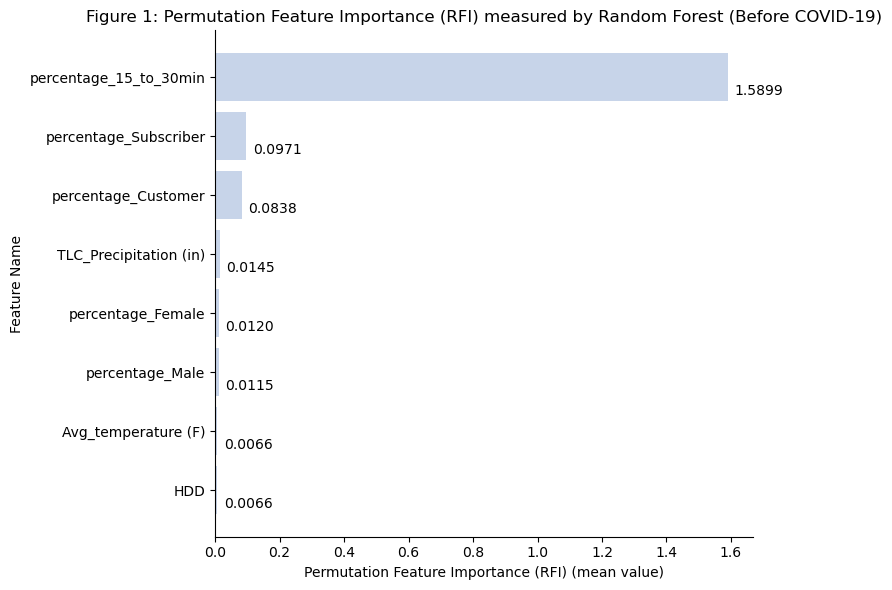

In [435]:
# plot the rank
importance_B_sorted = importance_B.sort_values(by='Absolute Importance(B)', ascending=True)

# change the colour, the positive value is blue, and the negative value is red
importance_B_sorted['Color'] = np.where(importance_B_sorted['Importance(B)'] >= 0,'#C7D4E9','#F4C7C9')

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(importance_B_sorted['Feature'], 
               importance_B_sorted['Importance(B)'], 
               color=importance_B_sorted['Color'])
# title
ax.set_title("Figure 1: Permutation Feature Importance (RFI) measured by Random Forest (Before COVID-19)")
# increase the name of features
for bar in bars.patches:
    ax.text(bar.get_width() + 0.02, bar.get_y() + 0.1, '{:.4f}'.format(bar.get_width()), fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Permutation Feature Importance (RFI) (mean value)')
ax.set_ylabel('Feature Name')

fig.tight_layout()
plt.show()

In [436]:
# After
After_importance = permutation_importance(RFA_final, test_x_A, test_y_A, 
                                           n_repeats=30, random_state=randomState_dt)
# Extract the importance results of features ( Mean, std and abs)
Result_A = After_importance.importances_mean
std_A = After_importance.importances_std
abs_Result_A = abs(Result_A)
# Extract the name of feature
feature_names = test_x_A.columns
# Create the dataframe
importance_A = pd.DataFrame({'Feature': feature_names, 
                             'Importance(A)': Result_A,
                             'Absolute Importance(A)': abs_Result_A,
                             'Std Deviation (A)': std_A})
# Sort by absolute importance from high to low
importance_A = importance_A.sort_values(by='Absolute Importance(A)', 
                                        ascending=False)
# extract the rank
importance_A['Rank(A)'] = importance_A['Absolute Importance(A)'].rank(ascending=False)
# Convert ranking number to integer type
importance_A['Rank(A)'] = importance_A['Rank(A)'].astype(int)
print("Table 9: The Relative Importance Ranking of Features after COVID-19")
# print the results
importance_A

Table 9: The Relative Importance Ranking of Features after COVID-19


,Feature,Importance(A),Absolute Importance(A),Std Deviation (A),Rank(A)
2,percentage_Female,0.298192,0.298192,0.081169,1
3,percentage_Male,0.204077,0.204077,0.061244,2
5,HDD,0.145449,0.145449,0.056778,3
1,percentage_above30min,0.074020,0.074020,0.019545,4
0,percentage_15_to_30min,0.066289,0.066289,0.023961,5
4,Avg_temperature (F),0.038309,0.038309,0.011371,6
6,CDD,0.033363,0.033363,0.012576,7
7,TLC_Precipitation (in),0.022053,0.022053,0.009265,8


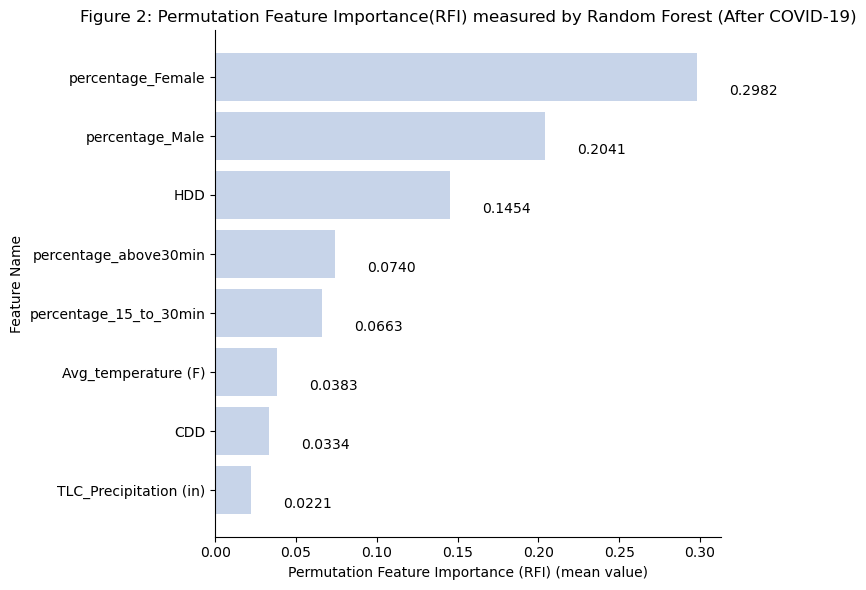

In [437]:
# plot the rank
importance_A_sorted = importance_A.sort_values(by='Absolute Importance(A)', ascending=True)

# change the colour, the positive value is blue, and the negative value is red
importance_A_sorted['Color'] = np.where(importance_A_sorted['Importance(A)'] >= 0,'#C7D4E9','#F4C7C9')
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(importance_A_sorted['Feature'], 
               importance_A_sorted['Importance(A)'], 
               color=importance_A_sorted['Color'])
# title
ax.set_title("Figure 2: Permutation Feature Importance(RFI) measured by Random Forest (After COVID-19)")
# increase the name of features
for bar in bars.patches:
    ax.text(bar.get_width() + 0.02, bar.get_y() + 0.1, '{:.4f}'.format(bar.get_width()), fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Permutation Feature Importance (RFI) (mean value)')
ax.set_ylabel('Feature Name')
fig.tight_layout()
plt.show()

## 6. RESULTS & DISCUSSION

Compare the performance of the models

Table 10: The hyperparameter Settings of each Model

|Target variable |Model|Data Size (Training/Testing) |Parameter Setting|
|:---|:---|:---|:---|
|Daily BSS Trip(Before)| Random Forest|132/45 |'max_depth': 10,'min_samples_split': 4|
||XGBoost||'max_depth': 20, 'n_estimators': 50. The other parameters in XGBoost were the default options|
|Daily BSS Trip(After)|Random Forest |143/48|'max_depth': 10, 'min_samples_split': 2|
||XGBoost||'max_depth': 20, 'n_estimators': 50. The other parameters in XGBoost were the default options|

Note:[1] 'max_depth' refers to the maximal depth (or height) of a tree.  
[2] 'min_samples_split' refers to the minimum number of samples to split a node.  
[3] 'n_estimators' refers to the number of trees in the ensemble. 

## 8. CONCLUSION

## REFERENCE

Ashqar, H. I., Elhenawy, M. and Rakha, H. A. (2019). ‘Modeling bike counts in a bike-sharing system considering the effect of weather conditions’. Case Studies on Transport Policy, 7 (2), pp. 261–268. doi: 10.1016/j.cstp.2019.02.011.
<br>
<br>
Ashraf, M. T., Hossen, M. A., Dey, K., El-Dabaja, S., Aljeri, M. and Naik, B. (2021). ‘Impacts of Bike Sharing Program on Subway Ridership in New York City’. Transportation Research Record: Journal of the Transportation Research Board, 2675 (9), pp. 924–934. doi: 10.1177/03611981211004980.
<br>
<br>
Bachand-Marleau, J., Lee, B. H. Y. and El-Geneidy, A. M. (2012). ‘Better Understanding of Factors Influencing Likelihood of Using Shared Bicycle Systems and Frequency of Use’. Transportation Research Record: Journal of the Transportation Research Board, 2314 (1), pp. 66–71. doi: 10.3141/2314-09.
<br>
<br>
Blazanin, G., Mondal, A., Asmussen, K. E. and Bhat, C. R. (2022). ‘E-scooter sharing and bikesharing systems: An individual-level analysis of factors affecting first-use and use frequency’. Transportation Research Part C: Emerging Technologies, 135, p. 103515. doi: 10.1016/j.trc.2021.103515.
<br>
<br>
Chibwe, J., Heydari, S., Faghih Imani, A. and Scurtu, A. (2021). ‘An exploratory analysis of the trend in the demand for the London bike-sharing system: From London Olympics to Covid-19 pandemic’. Sustainable Cities and Society, 69, p. 102871. doi: 10.1016/j.scs.2021.102871.
<br>
<br>
Corcoran, J., Li, T., Rohde, D., Charles-Edwards, E. and Mateo-Babiano, D. (2014). ‘Spatio-temporal patterns of a Public Bicycle Sharing Program: the effect of weather and calendar events’. Journal of Transport Geography, 41, pp. 292–305. doi: 10.1016/j.jtrangeo.2014.09.003.
<br>
<br>
El-Assi, W., Salah Mahmoud, M. and Nurul Habib, K. (2017). ‘Effects of built environment and weather on bike sharing demand: a station level analysis of commercial bike sharing in Toronto’. Transportation, 44 (3), pp. 589–613. doi: 10.1007/s11116-015-9669-z.
<br>
<br>
Engbers, L. H. and Hendriksen, I. J. (2010). ‘Characteristics of a population of commuter cyclists in the Netherlands: perceived barriers and facilitators in the personal, social and physical environment’. International Journal of Behavioral Nutrition and Physical Activity, 7 (1), p. 89. doi: 10.1186/1479-5868-7-89.
<br>
<br>
Feng, Y. and Wang, S. (2017). ‘A forecast for bicycle rental demand based on random forests and multiple linear regression’. in 2017 IEEE/ACIS 16th International Conference on Computer and Information Science (ICIS). 2017 IEEE/ACIS 16th International Conference on Computer and Information Science (ICIS), Wuhan, China: IEEE, pp. 101–105. doi: 10.1109/ICIS.2017.7959977.
<br>
<br>
Goh, H., Choi, G. and Song, Y. (2023). ‘How the COVID-19 pandemic changed travel behaviour? A case study on public bikes in Seoul’. Research in Transportation Economics, 101, p. 101339. doi: 10.1016/j.retrec.2023.101339.
<br>
<br>
Gregorutti, B., Michel, B. and Saint-Pierre, P. (2017). ‘Correlation and variable importance in random forests’. Statistics and Computing, 27 (3), pp. 659–678. doi: 10.1007/s11222-016-9646-1.
<br>
<br>
Hu, Y., Sun, Z., Li, W. and Pei, L. (2022). ‘Forecasting public bicycle rental demand using an optimized eXtreme Gradient Boosting model’. Journal of Intelligent & Fuzzy Systems, 42 (3), pp. 1783–1801. doi: 10.3233/JIFS-211202.
<br>
‘<br>
Jia, J., Liu, C., Wang, X., Zhang, H. and Xiao, Y. (2023). ‘Understanding bike-sharing mobility patterns in response to the COVID-19 pandemic’. Cities, 142, p. 104554. doi: 10.1016/j.cities.2023.104554.
<br>
<br>
Kim, K. (2018). ‘Investigation on the effects of weather and calendar events on bike-sharing according to the trip patterns of bike rentals of stations’. Journal of Transport Geography, 66, pp. 309–320. doi: 10.1016/j.jtrangeo.2018.01.001.
<br>
<br>
Kim, M. and Cho, G.-H. (2022). ‘Examining the causal relationship between bike-share and public transit in response to the COVID-19 pandemic’. Cities, 131, p. 104024. doi: 10.1016/j.cities.2022.104024.
<br>
<br>
Lainjo, Bongs. (2022). Application of Machine Learning in Predicting the Number of Bike Share Riders. InternationalJournal Business, Management, and Economics, 3(4).  339-370.  DOI: https://doi.org/10.47747/ijbme.v3i4.865.
<br>
<br>
Li, A. and Axhausen, K. W. (2019). ‘Comparison of short-term traffic demand prediction methods for transport services’. [object Object], p. 16 p. doi: 10.3929/ETHZ-B-000356143.
<br>
<br>
Li, H., Zhang, Y., Zhu, M. and Ren, G. (2021). ‘Impacts of COVID-19 on the usage of public bicycle share in London’. Transportation Research Part A: Policy and Practice, 150, pp. 140–155. doi: 10.1016/j.tra.2021.06.010.
<br>
<br>
Lyft (2021) *December 2021 Monthly Report*. Available at: https://mot-marketing-whitelabel-prod.s3.amazonaws.com/nyc/December-2021-Citi-Bike-Monthly-Report.pdf (Accessed: 7 April 2024).
<br>
<br>
Lyft (2020) *December 2019 Monthly Report*. Available at: https://d21xlh2maitm24.cloudfront.net/nyc/December-2019-Citi-Bike-Monthly-Report.pdf?mtime=20200218125724 (Accessed: 7 April 2024).
<br>
<br>
Ma, X., Zhang, X., Li, X., Wang, X. and Zhao, X. (2019). ‘Impacts of free-floating bikesharing system on public transit ridership’. Transportation Research Part D: Transport and Environment, 76, pp. 100–110. doi: 10.1016/j.trd.2019.09.014.
<br>’
<br>
National Centers for Environmental Information (NCEI) (2024) *Local Climatological Data Station Details:NY CITY CENTRAL PARK, NY US*.Available at: https://www.ncdc.noaa.gov/cdo-web/datasets/LCD/stations/WBAN:94728/detail  (Accessed: 7 April 2024).
<br>	
<br>			
National Centers for Environmental Information (NCEI) (2024) *NWS New York Significant Weather Events Archive*.Available at: https://www.weather.gov/okx/stormevents (Accessed: 7 April 2024).
<br>
<br>
Padmanabhan, V., Penmetsa, P., Li, X., Dhondia, F., Dhondia, S. and Parrish, A. (2021). ‘COVID-19 effects on shared-biking in New York, Boston, and Chicago’. Transportation Research Interdisciplinary Perspectives, 9, p. 100282. doi: 10.1016/j.trip.2020.100282.
<br>
<br>
Reilly, K. H., Wang, S. M. and Crossa, A. (2022). ‘Gender disparities in New York City bike share usage’. International Journal of Sustainable Transportation, 16 (3), pp. 237–245. doi: 10.1080/15568318.2020.1861393.
<br>
<br>
Teixeira, J. F., Silva, C. and Moura E Sá, F. (2021). ‘The motivations for using bike sharing during the COVID-19 pandemic: Insights from Lisbon’. Transportation Research Part F: Traffic Psychology and Behaviour, 82, pp. 378–399. doi: 10.1016/j.trf.2021.09.016.
<br>
<br>
Uddin, M., Hwang, H.-L. and Hasnine, M. S. (2023). ‘An interpretable machine learning framework to understand bikeshare demand before and during the COVID-19 pandemic in New York City’. Transportation Planning and Technology, 46 (4), pp. 482–498. doi: 10.1080/03081060.2023.2201280.
<br>
<br>
Wang, H. and Noland, R. B. (2021). ‘Bikeshare and subway ridership changes during the COVID-19 pandemic in New York City’. Transport Policy, 106, pp. 262–270. doi: 10.1016/j.tranpol.2021.04.004.
<br>
<br>
Scikit-learn (no date)*Permutation Importance vs Random Forest Feature Importance (MDI)*	. Available at: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py (Accessed: 18 April 2024).
<br>
<br>
